# Loan Prediction III

### Dian Vitiana Ningrum_0621154000020

#### Case : Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set. Source: Analytics Vidhya

## IMPORT PACKAGES

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics 

## LOADING DATA

In [3]:
trainDF = pd.read_excel(r'E:\traindata.xlsx', sheet_name ='traindata')
testDF = pd.read_excel (r'E:\testdata.xlsx', sheet_name = 'testdata' )

In [4]:
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null int64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 62.4+ KB


## DROP DATA

In [5]:
###Drop Training Data
trainDF_ = trainDF.drop("Loan_ID", axis=1)
trainDF_ = trainDF_.drop("Education", axis=1)
trainDF_ = trainDF_.drop("Self_Employed", axis=1)
trainDF_ = trainDF_.drop("Property_Area", axis=1)
trainDF_ = trainDF_.drop("Married", axis=1)
trainDF_ = trainDF_.drop("Dependents", axis=1)
trainDF_['Gender'].replace(['Female','Male'],[0,1],inplace=True)
trainDF_['Loan_Status'].replace(['Y','N'],[1,0],inplace=True) 

In [6]:
### Drop data testing
testDF_ = testDF.drop("Loan_ID", axis=1)
testDF_ = testDF_.drop("Married", axis=1)
testDF_ = testDF_.drop("Education", axis=1)
testDF_ = testDF_.drop("Self_Employed", axis=1)
testDF_ = testDF_.drop("Property_Area", axis=1)
testDF_ = testDF_.drop("Dependents", axis=1)
testDF_['Gender'].replace(['Female','Male'],[0,1],inplace=True) 

In [ ]:
### Dropping training data and testing data is useful to make sure data we will use to analyze is the numeric or categoric data  

In [7]:
trainDF_.head()

,Gender,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1.0,5849,0,NaN,360.0,1.0,1
1,1.0,4583,1508,128.0,360.0,1.0,0
2,1.0,3000,0,66.0,360.0,1.0,1
3,1.0,2583,2358,120.0,360.0,1.0,1
4,1.0,6000,0,141.0,360.0,1.0,1


In [8]:
testDF_.head()

,Gender,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1.0,5720,0,110.0,360.0,1.0
1,1.0,3076,1500,126.0,360.0,1.0
2,1.0,5000,1800,208.0,360.0,1.0
3,1.0,2340,2546,100.0,360.0,NaN
4,1.0,3276,0,78.0,360.0,1.0


## MISSING VALUE DETECTION

In [9]:
for col in trainDF_.columns.values:
    if trainDF_[col].isnull().values.any():
        print("Missing values in "+col)

Missing values in Gender
Missing values in LoanAmount
Missing values in Loan_Amount_Term
Missing values in Credit_History


In [10]:
for col in testDF_.columns.values:
    if testDF_[col].isnull().values.any():
        print("Missing values in "+col)

Missing values in Gender
Missing values in LoanAmount
Missing values in Loan_Amount_Term
Missing values in Credit_History


In [58]:
### based on the missing value detection, there are few data that have missing value, there are Gender, LoanAmount, Loan_Amount_Term and Credit History

In [11]:
trainDF_.isnull().any()

Gender                True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Loan_Status          False
dtype: bool

In [12]:
testDF_.isnull().any()

Gender                True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
dtype: bool

In [13]:
#imputasi missing value
trainDF_["Gender"] = trainDF_["Gender"].fillna(method="bfill")
trainDF_["LoanAmount"] = trainDF_["LoanAmount"].fillna(method="bfill")
trainDF_["Loan_Amount_Term"] = trainDF_["Loan_Amount_Term"].fillna(method="bfill")
trainDF_["Credit_History"] = trainDF_["Credit_History"].fillna(method="bfill")
testDF_["Gender"] = testDF_["Gender"].fillna(method="bfill")
testDF_["LoanAmount"] = testDF_["LoanAmount"].fillna(method="bfill")
testDF_["Loan_Amount_Term"] = testDF_["Loan_Amount_Term"].fillna(method="bfill")
testDF_["Credit_History"] = testDF_["Credit_History"].fillna(method="bfill")

In [14]:
trainDF_.isnull().any()

Gender               False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Loan_Status          False
dtype: bool

In [15]:
testDF_.isnull().any()

Gender               False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
dtype: bool

In [59]:
### After knew which data that has missing value, then we have to input the data so there is no more missing value.

## EXPLORATION THE DATA 

In [16]:
trainDF_.describe()

,Gender,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,6.140000e+02,614.000000,614.000000,614.00000,614.000000
mean,0.815961,5403.459283,1.868240e+07,146.416938,342.410423,0.84202,0.687296
std,0.387832,6109.041673,4.030156e+08,84.917398,64.428629,0.36502,0.463973
min,0.000000,150.000000,0.000000e+00,9.000000,12.000000,0.00000,0.000000
25%,1.000000,2877.500000,0.000000e+00,100.000000,360.000000,1.00000,0.000000
50%,1.000000,3812.500000,1.221000e+03,128.000000,360.000000,1.00000,1.000000
75%,1.000000,5795.000000,2.324000e+03,166.750000,360.000000,1.00000,1.000000
max,1.000000,81000.000000,9.858000e+09,700.000000,480.000000,1.00000,1.000000


In [ ]:
### The table above describe the mean, standard deviation, minimum data, first quartile data, medium, third quartile, and the maximum of data. Based on that table, we can see the largest data of the ApplicantInome is US$ 81.000, and the minimum ApplicantIncome is US$ 150,. the total amount of people who Loan are 614 people, and the gender codeof Female is 0, and the code of Male is 1. 

In [17]:
correlationstrain = trainDF_.corr() 
correlationstrain

,Gender,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
Gender,1.000000,0.050834,0.022032,0.118193,-0.074923,0.013231,0.015090
ApplicantIncome,0.050834,1.000000,-0.022918,0.555732,-0.046531,-0.006915,-0.004710
CoapplicantIncome,0.022032,-0.022918,1.000000,-0.036714,-0.098806,0.020094,0.031291
LoanAmount,0.118193,0.555732,-0.036714,1.000000,0.038747,0.015444,-0.039871
Loan_Amount_Term,-0.074923,-0.046531,-0.098806,0.038747,1.000000,-0.001817,-0.022549
Credit_History,0.013231,-0.006915,0.020094,0.015444,-0.001817,1.000000,0.516944
Loan_Status,0.015090,-0.004710,0.031291,-0.039871,-0.022549,0.516944,1.000000


In [60]:
### based on the correation table above, we can see that the strongest correlation is the correlation between Loan Amount and ApplicantIncome, the correlation value is 0.555732.

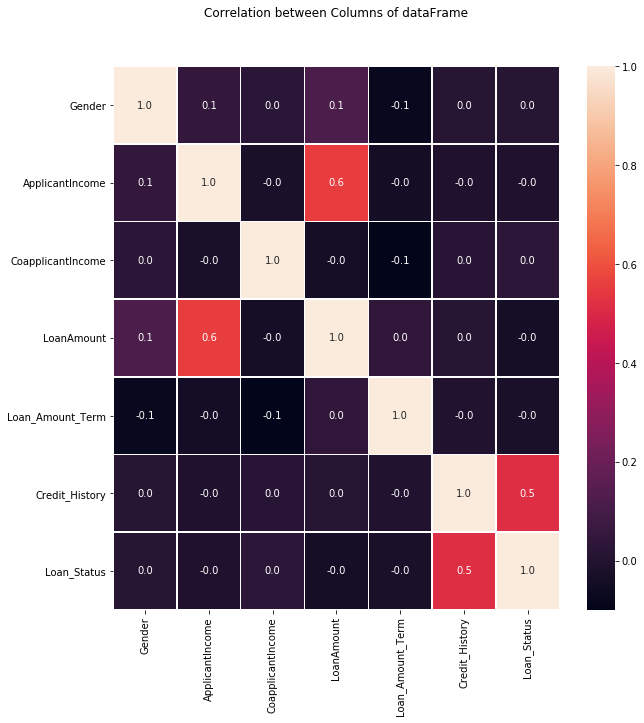

In [18]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlationstrain, annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title("Correlation between Columns of dataFrame",y=1.08)
plt.show() 

In [19]:
correlationstest = testDF_.corr() 
correlationstest

,Gender,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Gender,1.000000,0.069703,0.079840,0.088098,-0.066552,0.026586
ApplicantIncome,0.069703,1.000000,-0.110335,0.493972,0.023851,0.098693
CoapplicantIncome,0.079840,-0.110335,1.000000,0.148134,-0.010962,-0.054640
LoanAmount,0.088098,0.493972,0.148134,1.000000,0.093133,0.014933
Loan_Amount_Term,-0.066552,0.023851,-0.010962,0.093133,1.000000,-0.022198
Credit_History,0.026586,0.098693,-0.054640,0.014933,-0.022198,1.000000


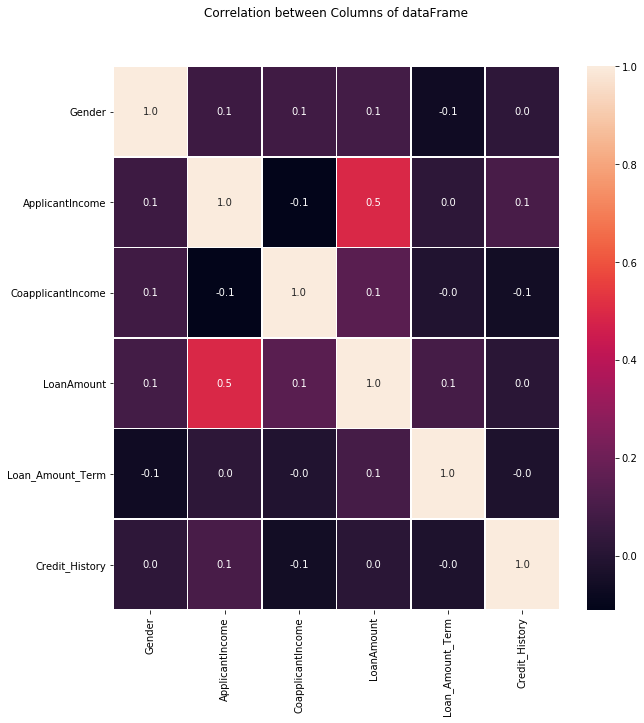

In [20]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlationstest, annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title("Correlation between Columns of dataFrame",y=1.08)
plt.show()

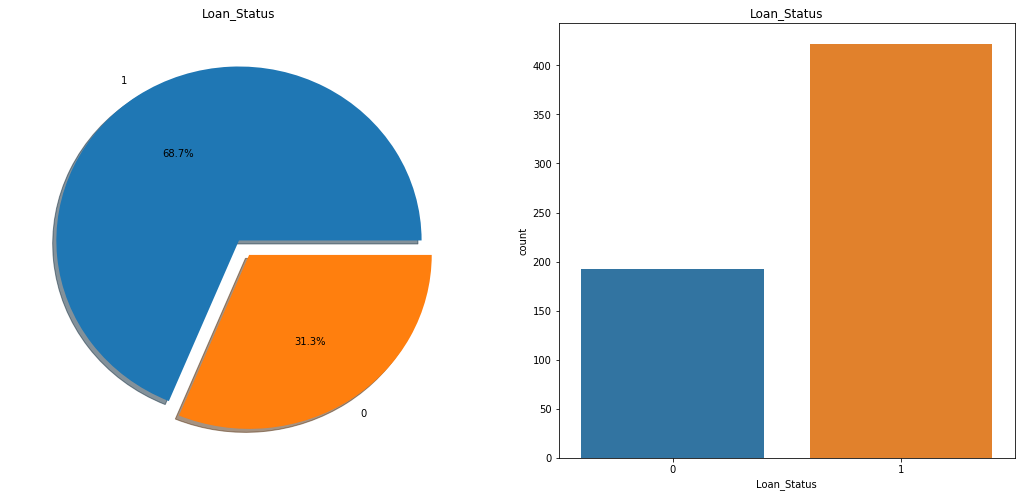

In [21]:
f,ax=plt.subplots(1,2,figsize=(18,8))
trainDF_['Loan_Status'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Loan_Status')
ax[0].set_ylabel('')
sns.countplot('Loan_Status',data=trainDF_,ax=ax[1])
ax[1].set_title('Loan_Status')
plt.show()

In [61]:
## the pie chart and histogram shown above give us information about percentage of the Loan Status. About 68,7% people Loan, and 31,3% remain don't loan. 

In [22]:
trainDF_.groupby(['Gender','Loan_Status'])['Loan_Status'].count()

Gender  Loan_Status
0.0     0               37
        1               76
1.0     0              155
        1              346
Name: Loan_Status, dtype: int64

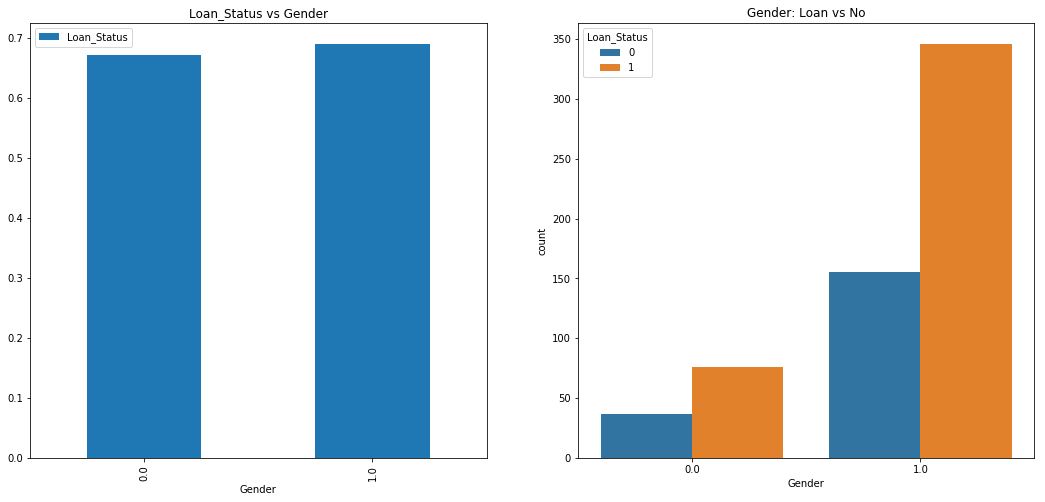

In [23]:
f,ax=plt.subplots(1,2,figsize=(18,8))
trainDF_[['Gender','Loan_Status']].groupby(['Gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Loan_Status vs Gender')
sns.countplot('Gender',hue='Loan_Status',data=trainDF_,ax=ax[1])
ax[1].set_title('Gender: Loan vs No')
plt.show()

In [62]:
### Based on the Histogram about Gender vs Loan Status, 76 female Loan, and  346 male make loan. There are 37 female don't loan, and 155 male don't loan. 

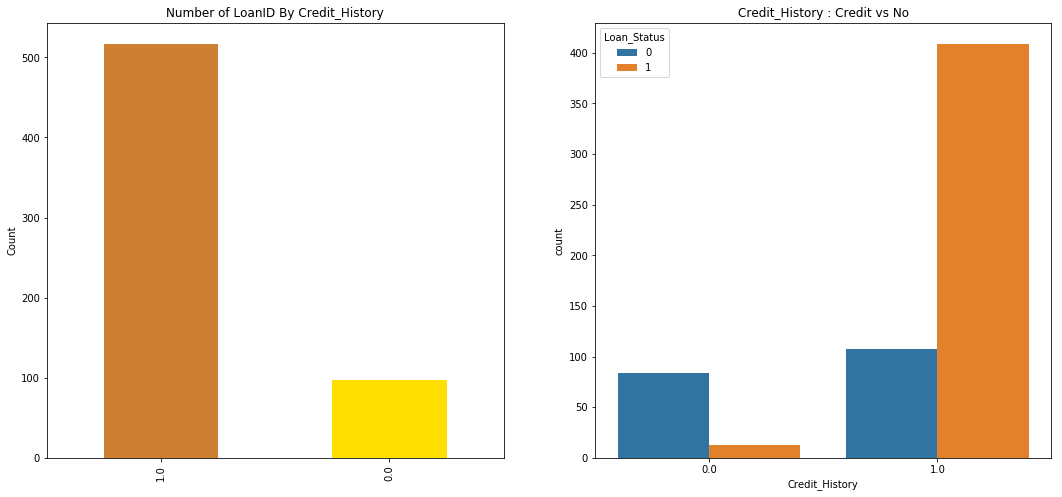

In [24]:
f,ax=plt.subplots(1,2,figsize=(18,8))
trainDF_['Credit_History'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of LoanID By Credit_History')
ax[0].set_ylabel('Count')
sns.countplot('Credit_History',hue='Loan_Status',data=trainDF_,ax=ax[1])
ax[1].set_title('Credit_History : Credit vs No')
plt.show()

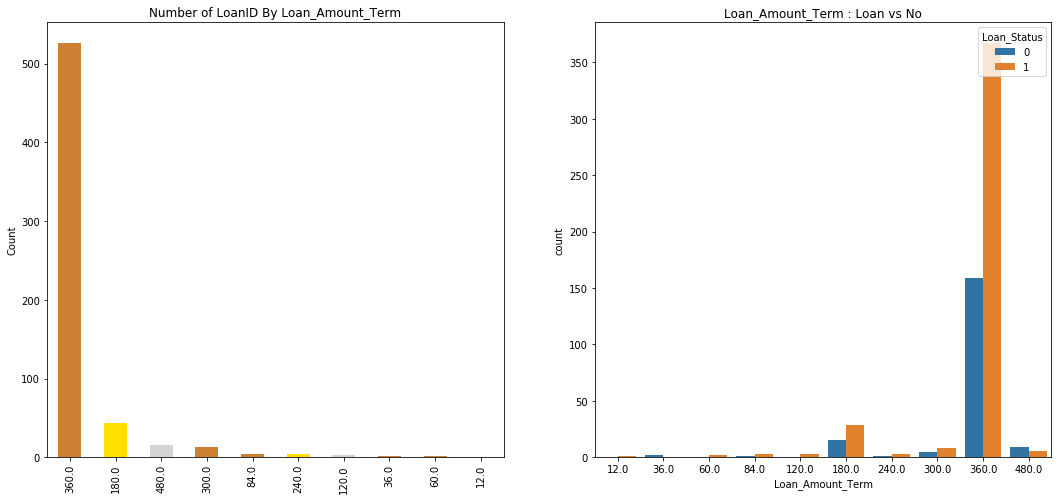

In [25]:
f,ax=plt.subplots(1,2,figsize=(18,8))
trainDF_['Loan_Amount_Term'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of LoanID By Loan_Amount_Term')
ax[0].set_ylabel('Count')
sns.countplot('Loan_Amount_Term',hue='Loan_Status',data=trainDF_,ax=ax[1])
ax[1].set_title('Loan_Amount_Term : Loan vs No')
plt.show()

In [26]:
print('Largest Income was of:',trainDF_['ApplicantIncome'].max(),'Dollars')
print('Smallest Income  was of:',trainDF_['ApplicantIncome'].min(),'Dolars')
print('Average Income at the Loan:',trainDF_['ApplicantIncome'].mean(),'Dollars')

Largest Income was of: 81000 Dollars
Smallest Income  was of: 150 Dolars
Average Income at the Loan: 5403.459283387622 Dollars


C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


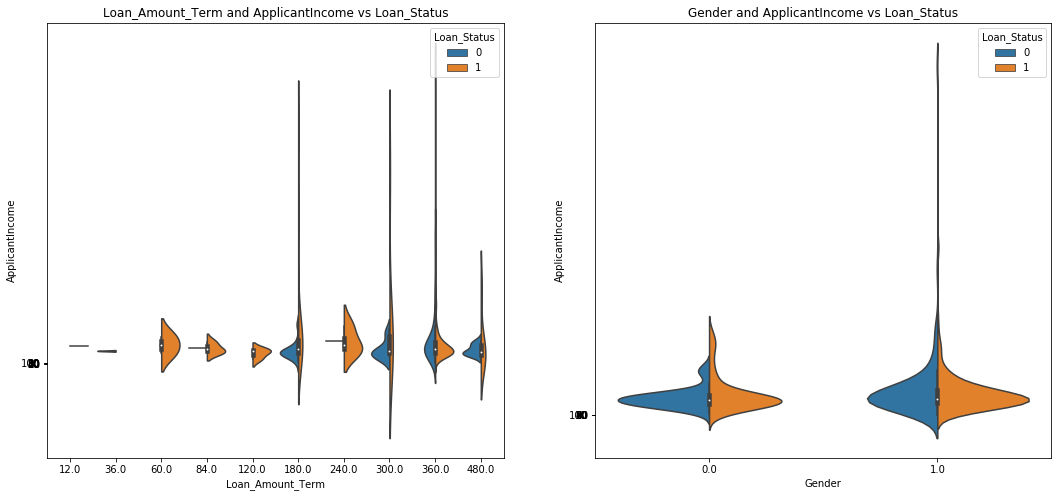

In [27]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Loan_Amount_Term","ApplicantIncome", hue="Loan_Status", data=trainDF_,split=True,ax=ax[0])
ax[0].set_title('Loan_Amount_Term and ApplicantIncome vs Loan_Status')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Gender","ApplicantIncome", hue="Loan_Status", data=trainDF_,split=True,ax=ax[1])
ax[1].set_title('Gender and ApplicantIncome vs Loan_Status')
ax[1].set_yticks(range(0,110,10))
plt.show()  

In [ ]:
### Violin plot above ashown us about Gender and ApplicantIncome data versus Loan Status.

## CLASSIFICATION

In [ ]:
### We use Classification methods to Classify the data Loan Prediction between trainind data and testing data. The methods we use are Random Forest, KNN, and Naive Bayes Methods. from these accuration values from these mehods that we got, we choose the highest accuration values to classify the Loan Prediction data. 

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, auc, roc_curve
from sklearn.model_selection import train_test_split

In [29]:
trainX_=trainDF_.drop("Loan_Status", axis=1)
trainY_ = trainDF_['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(trainX_, trainY_, test_size = 0.20, random_state = 123)

### RANDOM FOREST

In [30]:
RF = RandomForestClassifier(max_depth=None, random_state=0)
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [31]:
RF.score(X_train, y_train)

0.9938900203665988

In [32]:
RF.score(trainX_, trainY_)

0.9413680781758957

In [33]:
y_predict=RF.predict(X_test)

In [34]:
y_predict=RF.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_predict)
print(conf_matrix)

[[19 23]
 [10 71]]


In [35]:
Class= trainDF_['Loan_Status'].unique()
conf_matrix_df = pd.DataFrame(data=conf_matrix, columns=Class, index=Class)
conf_matrix_df

,1,0
1,19,23
0,10,71


In [36]:
akurasiRF=accuracy_score(y_test, y_predict)
presisiRF=precision_score(y_test, y_predict)
recallsRF=recall_score(y_test,y_predict)

In [37]:
print(akurasiRF)
print(presisiRF)
print(recallsRF)

0.7317073170731707
0.7553191489361702
0.8765432098765432


In [38]:
from sklearn.metrics import auc, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
auc = auc(fpr, tpr)
print('aucRF =', auc)

aucRF = 0.6644620811287478


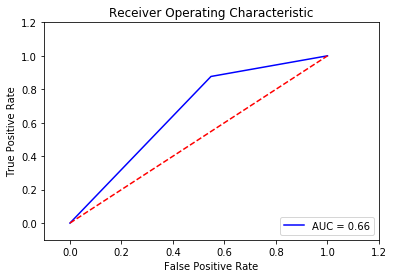

In [39]:
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
### from the Random Forest methods, we got the accuration value. the value is about 73% accurate to predict the training data with testing data.And the Receiver Operating Characteristics curve is shown the picture above. the AUC value is 0.66. 

### KNN

In [40]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [41]:
knn.score(X_train, y_train)

0.7474541751527495

In [42]:
yknn_predict=knn.predict(X_test)

In [43]:
conf_matrix = confusion_matrix(y_test, yknn_predict)
print(conf_matrix)

[[ 7 35]
 [17 64]]


In [44]:
Class= trainDF_['Loan_Status'].unique()
conf_matrix_df = pd.DataFrame(data=conf_matrix, columns=Class, index=Class)
conf_matrix_df

,1,0
1,7,35
0,17,64


In [45]:
akurasiKnn=accuracy_score(y_test, y_predict)
presisiKnn=precision_score(y_test, y_predict)
recallsKnn=recall_score(y_test,y_predict)

In [46]:
print(akurasiKnn)
print(presisiKnn)
print(recallsKnn)

0.7317073170731707
0.7553191489361702
0.8765432098765432


In [47]:
from sklearn.metrics import auc, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
auc = auc(fpr, tpr)
print('aucKnn =', auc)

aucKnn = 0.6644620811287478


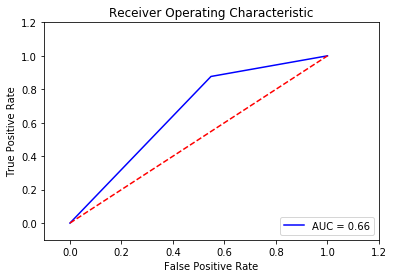

In [48]:
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
### KNN Methods we used to classify the Loan Prediction give us 73,17% accurate data to predict the training data with testing data, and the AUC value we got from Receiver Opertaing Characteristics is 0.66.

### NAIVE BAYES

In [49]:
nb= GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None)

In [50]:
nb.score(X_train, y_train)

0.3095723014256619

In [51]:
ynb_predict=nb.predict(X_test)

In [52]:
conf_matrixnb = confusion_matrix(y_test, ynb_predict)
print(conf_matrixnb)

[[42  0]
 [81  0]]


In [53]:
Class= trainDF_['Loan_Status'].unique()
conf_matrix_df = pd.DataFrame(data=conf_matrix, columns=Class, index=Class)
conf_matrix_df

,1,0
1,7,35
0,17,64


In [54]:
akurasiNB=accuracy_score(y_test, y_predict)
presisiNB=precision_score(y_test, y_predict)
recallsNB=recall_score(y_test,y_predict)

In [57]:
print(akurasiNB)
print(presisiNB)
print(recallsNB)

0.7317073170731707
0.7553191489361702
0.8765432098765432


In [55]:
from sklearn.metrics import auc, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
auc = auc(fpr, tpr)
print('aucNB =', auc)

aucNB = 0.6644620811287478


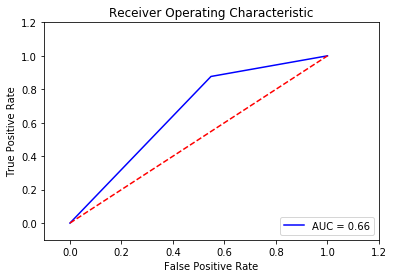

In [56]:
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
### we can get 73,17% accurate data from Naive Bayes Classification, 75,53% Precition, 87,65% Recall. from the curve, we can get 0.66 from AUC value

In [ ]:
## between these three methods of classification, the Accuration values are the same, that is 73,17%, also the Precision and recall values. So we can choose one of them to classify the Loan Predict Data. 